In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
#initialize dataframe for saving the accuracies into csv file
df = pd.DataFrame({'90%': [],
                    '80%': [],
                    '70%': [],
                    '60%': [],
                    '50%': []})

In [95]:
acc = []
model = []
#Load dataset
crops = pd.read_csv('input/Crop_recommendation.csv')

X=crops[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # input values
Y=crops['label']  # output

test_train_ratio = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.3
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.4
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.5
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)

In [96]:
#K-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
def knearest(xtrain, xtest, ytrain, ytest):
    error1=[]
    error2=[]
    for k in range(1,10):
      k_nn = KNeighborsClassifier(n_neighbors=k)
      k_nn.fit(xtrain,ytrain)
      y_pred1 = k_nn.predict(xtrain)
      error1.append(np.mean(ytrain!=y_pred1, keepdims=False))
      y_pred2 = k_nn.predict(xtest)
      error2.append(np.mean(ytest!=y_pred2, keepdims=False))
    plt.plot(range(1,10),error1,label='train')
    plt.plot(range(1,10),error2,label='test')
    plt.xlabel('K - Value')
    plt.ylabel('Error')
    plt.legend()

In [97]:
from sklearn.preprocessing import MinMaxScaler
def analysis(xtrain, xtest, ytrain, ytest):
    norm = MinMaxScaler().fit(xtrain)
    X_train_norm = norm.transform(xtrain)
    X_test_norm = norm.transform(xtest)

    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train_norm,ytrain)
    predicted_values = knn.predict(X_test_norm)

    x = metrics.accuracy_score(ytest, predicted_values)

    acc.append(x)                         #accuracy
    print("KNN's Accuracy is: ", x)

    #print(classification_report(ytest,predicted_values))
    return x

KNN's Accuracy is:  0.9636363636363636


0.9636363636363636

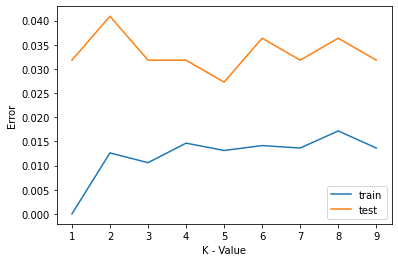

In [98]:
knearest(X_train, X_test, y_train, y_test)
analysis(X_train, X_test, y_train, y_test)

KNN's Accuracy is:  0.9772727272727273


0.9772727272727273

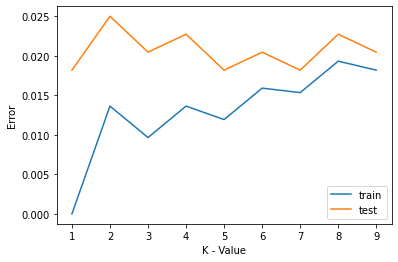

In [99]:
knearest(X_train1, X_test1, y_train1, y_test1)
analysis(X_train1, X_test1, y_train1, y_test1)

KNN's Accuracy is:  0.9651515151515152


0.9651515151515152

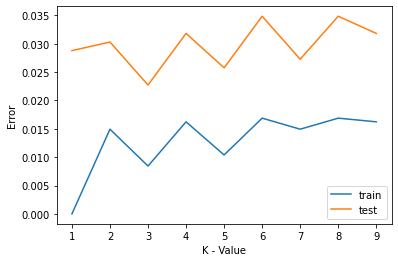

In [100]:
knearest(X_train2, X_test2, y_train2, y_test2)
analysis(X_train2, X_test2, y_train2, y_test2)

KNN's Accuracy is:  0.975


0.975

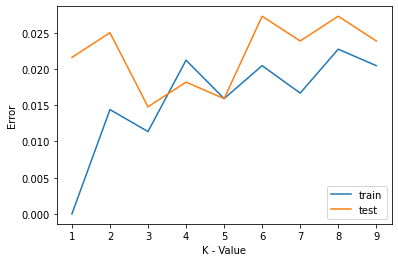

In [101]:
knearest(X_train3, X_test3, y_train3, y_test3)
analysis(X_train3, X_test3, y_train3, y_test3)

KNN's Accuracy is:  0.9709090909090909


0.9709090909090909

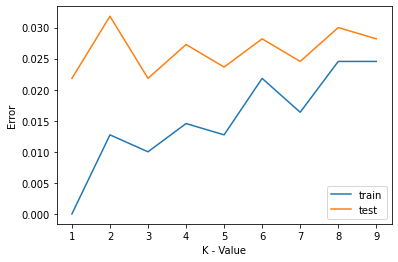

In [102]:
knearest(X_train4, X_test4, y_train4, y_test4)
analysis(X_train4, X_test4, y_train4, y_test4)

In [103]:
print(acc)

[0.9636363636363636, 0.9772727272727273, 0.9651515151515152, 0.975, 0.9709090909090909]


In [104]:
#add new results to dataframe, repeat this 10 times
df.loc[len(df.index)] = [acc[0], acc[1], acc[2], acc[3], acc[4]]
print(df)

        90%       80%       70%       60%       50%
0  0.977273  0.965909  0.981818  0.973864  0.965455
1  0.986364  0.975000  0.969697  0.968182  0.973636
2  0.981818  0.975000  0.978788  0.968182  0.966364
3  0.977273  0.981818  0.974242  0.965909  0.966364
4  0.990909  0.959091  0.975758  0.973864  0.964545
5  0.981818  0.970455  0.978788  0.972727  0.970909
6  0.981818  0.981818  0.978788  0.977273  0.971818
7  0.990909  0.970455  0.963636  0.967045  0.970909
8  0.986364  0.972727  0.965152  0.970455  0.959091
9  0.963636  0.977273  0.965152  0.975000  0.970909


In [105]:
#save latest dataframe to csv file
df.to_csv('input/knn_accuracies.csv', index=False, mode='w')